In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(55):
    if i==0:
        train = pd.read_pickle('salida/nuevo4/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

5
7
8
10
14
15
19
20
21
22
23
25
26
27
31
32
34
35
36
40
41
42
46
48
49
53


In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.412809,2.893929,2.157,2.122,3.793043,0.004627,0.226893,0,0.400000,0,4,2,5,0.750000,0,,0,,0.50,neutral
1,0.034029,2.894793,1.544,1.157,3.894946,0.007225,0.071478,1,0.400000,0,4,2,5,0.500000,0,,0,,0.25,contradiction
2,0.171239,1.461504,1.640,1.371,3.895909,0.004943,0.082896,0,0.200000,0,3,1,5,0.666667,0,,0,,1.00,entailment
3,0.504948,1.450955,2.500,1.500,3.851369,0.003431,0.527127,0,0.250000,1,2,1,4,1.000000,0,,0,,0.00,neutral
4,0.187579,1.395699,1.406,1.000,3.869048,0.004221,0.067400,0,0.250000,0,2,1,4,1.000000,0,,0,,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289362,0.180090,5.705536,1.356,1.122,3.751133,0.005448,0.180748,1,1.000000,1,6,4,4,0.333333,0,,0,,0.00,contradiction
289363,0.155078,7.074355,1.315,1.188,3.812044,0.005321,0.107068,1,1.250000,0,9,5,4,0.222222,0,,0,,1.00,neutral
289364,0.115104,2.919963,2.015,1.384,3.624098,0.006082,0.166868,1,0.333333,0,5,2,6,0.400000,0,,0,,0.50,neutral
289365,-0.052204,2.938426,1.603,0.650,3.801681,0.005378,0.033230,3,0.333333,0,6,2,6,0.333333,0,,0,,0.25,contradiction


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

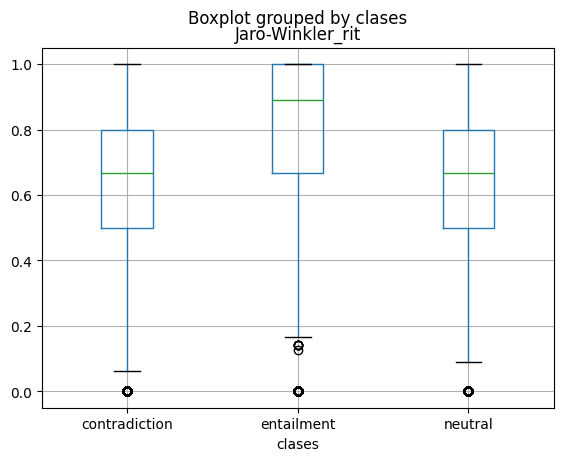

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.412809,2.893929,2.157,2.122,3.793043,0.004627,0.226893,0,0.400000,0,4,2,5,0.750000,0,0,0.50,neutral
1,0.034029,2.894793,1.544,1.157,3.894946,0.007225,0.071478,1,0.400000,0,4,2,5,0.500000,0,0,0.25,contradiction
2,0.171239,1.461504,1.640,1.371,3.895909,0.004943,0.082896,0,0.200000,0,3,1,5,0.666667,0,0,1.00,entailment
3,0.504948,1.450955,2.500,1.500,3.851369,0.003431,0.527127,0,0.250000,1,2,1,4,1.000000,0,0,0.00,neutral
4,0.187579,1.395699,1.406,1.000,3.869048,0.004221,0.067400,0,0.250000,0,2,1,4,1.000000,0,0,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289362,0.180090,5.705536,1.356,1.122,3.751133,0.005448,0.180748,1,1.000000,1,6,4,4,0.333333,0,0,0.00,contradiction
289363,0.155078,7.074355,1.315,1.188,3.812044,0.005321,0.107068,1,1.250000,0,9,5,4,0.222222,0,0,1.00,neutral
289364,0.115104,2.919963,2.015,1.384,3.624098,0.006082,0.166868,1,0.333333,0,5,2,6,0.400000,0,0,0.50,neutral
289365,-0.052204,2.938426,1.603,0.650,3.801681,0.005378,0.033230,3,0.333333,0,6,2,6,0.333333,0,0,0.25,contradiction


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [7]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [8]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [9]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [10]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.422690,0.199205,0.758353,0.625367,0.220122,0.872947,-0.042105,0.269434,0.437979,0.149374,0.422917,0.224048,-0.067805,0.006150,0.000347,-0.189336
distancias,0.422690,1.000000,-0.109582,0.730816,0.739484,0.425643,0.470635,-0.019057,0.862627,0.326780,0.370149,0.999021,0.039481,-0.417049,0.001667,0.057208,-0.379646
entropia_total,0.199205,-0.109582,1.000000,0.121123,-0.058164,-0.148140,0.169590,0.086945,-0.102005,0.065687,0.223018,-0.113186,-0.000743,0.227221,-0.004933,-0.018968,0.116728
entropias,0.758353,0.730816,0.121123,1.000000,0.888321,0.392416,0.795143,-0.051737,0.610687,0.381077,0.226877,0.726336,0.066789,-0.292690,0.002265,0.026206,-0.316138
mutinf,0.625367,0.739484,-0.058164,0.888321,1.000000,0.446721,0.695323,-0.050278,0.647678,0.304142,0.216565,0.734505,0.015966,-0.344541,0.001684,0.057317,-0.327969
mearts,0.220122,0.425643,-0.148140,0.392416,0.446721,1.000000,0.258759,-0.040514,0.422115,0.110709,0.125175,0.453187,-0.024981,-0.263771,0.002566,0.016252,-0.205383
max_info,0.872947,0.470635,0.169590,0.795143,0.695323,0.258759,1.000000,-0.070970,0.379956,0.554874,0.129565,0.469054,0.064108,-0.114940,0.001313,0.005448,-0.209591
list_comp,-0.042105,-0.019057,0.086945,-0.051737,-0.050278,-0.040514,-0.070970,1.000000,-0.054946,-0.054070,0.391879,-0.020474,0.064594,-0.056862,-0.002118,0.033054,-0.393177
diferencias,0.269434,0.862627,-0.102005,0.610687,0.647678,0.422115,0.379956,-0.054946,1.000000,0.257575,0.251538,0.868025,-0.266294,-0.443266,-0.006365,0.051141,-0.339111
list_incomp,0.437979,0.326780,0.065687,0.381077,0.304142,0.110709,0.554874,-0.054070,0.257575,1.000000,0.074136,0.326483,0.041419,0.034566,-0.003588,0.000403,-0.152252


<Axes: >

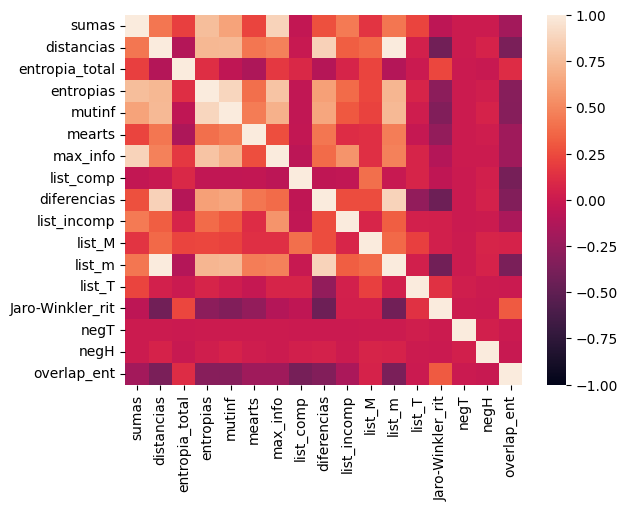

In [11]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.422690,0.199205,0.758353,0.625367,0.220122,0.872947,-0.042105,0.269434,0.437979,0.149374,0.422917,0.224048,-0.067805,0.006150,0.000347,-0.189336
distancias,0.422690,1.000000,-0.109582,0.730816,0.739484,0.425643,0.470635,-0.019057,0.862627,0.326780,0.370149,0.999021,0.039481,-0.417049,0.001667,0.057208,-0.379646
entropia_total,0.199205,-0.109582,1.000000,0.121123,-0.058164,-0.148140,0.169590,0.086945,-0.102005,0.065687,0.223018,-0.113186,-0.000743,0.227221,-0.004933,-0.018968,0.116728
entropias,0.758353,0.730816,0.121123,1.000000,0.888321,0.392416,0.795143,-0.051737,0.610687,0.381077,0.226877,0.726336,0.066789,-0.292690,0.002265,0.026206,-0.316138
mutinf,0.625367,0.739484,-0.058164,0.888321,1.000000,0.446721,0.695323,-0.050278,0.647678,0.304142,0.216565,0.734505,0.015966,-0.344541,0.001684,0.057317,-0.327969
mearts,0.220122,0.425643,-0.148140,0.392416,0.446721,1.000000,0.258759,-0.040514,0.422115,0.110709,0.125175,0.453187,-0.024981,-0.263771,0.002566,0.016252,-0.205383
max_info,0.872947,0.470635,0.169590,0.795143,0.695323,0.258759,1.000000,-0.070970,0.379956,0.554874,0.129565,0.469054,0.064108,-0.114940,0.001313,0.005448,-0.209591
list_comp,-0.042105,-0.019057,0.086945,-0.051737,-0.050278,-0.040514,-0.070970,1.000000,-0.054946,-0.054070,0.391879,-0.020474,0.064594,-0.056862,-0.002118,0.033054,-0.393177
diferencias,0.269434,0.862627,-0.102005,0.610687,0.647678,0.422115,0.379956,-0.054946,1.000000,0.257575,0.251538,0.868025,-0.266294,-0.443266,-0.006365,0.051141,-0.339111
list_incomp,0.437979,0.326780,0.065687,0.381077,0.304142,0.110709,0.554874,-0.054070,0.257575,1.000000,0.074136,0.326483,0.041419,0.034566,-0.003588,0.000403,-0.152252


In [13]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
distancias,0.422690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropia_total,0.199205,-0.109582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropias,0.758353,0.730816,0.121123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf,0.625367,0.739484,-0.058164,0.888321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mearts,0.220122,0.425643,-0.148140,0.392416,0.446721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info,0.872947,0.470635,0.169590,0.795143,0.695323,0.258759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_comp,-0.042105,-0.019057,0.086945,-0.051737,-0.050278,-0.040514,-0.070970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
diferencias,0.269434,0.862627,-0.102005,0.610687,0.647678,0.422115,0.379956,-0.054946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_incomp,0.437979,0.326780,0.065687,0.381077,0.304142,0.110709,0.554874,-0.054070,0.257575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [14]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias sumas 0.7583533010438599
entropias distancias 0.730815617281462
mutinf distancias 0.7394837462748771
mutinf entropias 0.8883205963278962
max_info sumas 0.8729473297835477
max_info entropias 0.7951428526931082
diferencias distancias 0.8626270075711098
list_m distancias 0.9990206731012147
list_m entropias 0.726336307848807
list_m mutinf 0.7345054190364523
list_m diferencias 0.8680250944787475


In [15]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

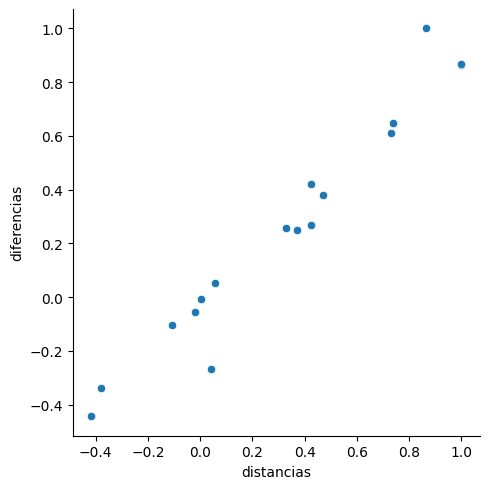

In [16]:
# Checar variables colineales
sns.relplot(data=train_m, x="distancias", y="diferencias")

In [17]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [18]:
# SICK
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    elif i == "neutral":
        y_train.append(2)
    else:
        y_train.append(0)

In [19]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

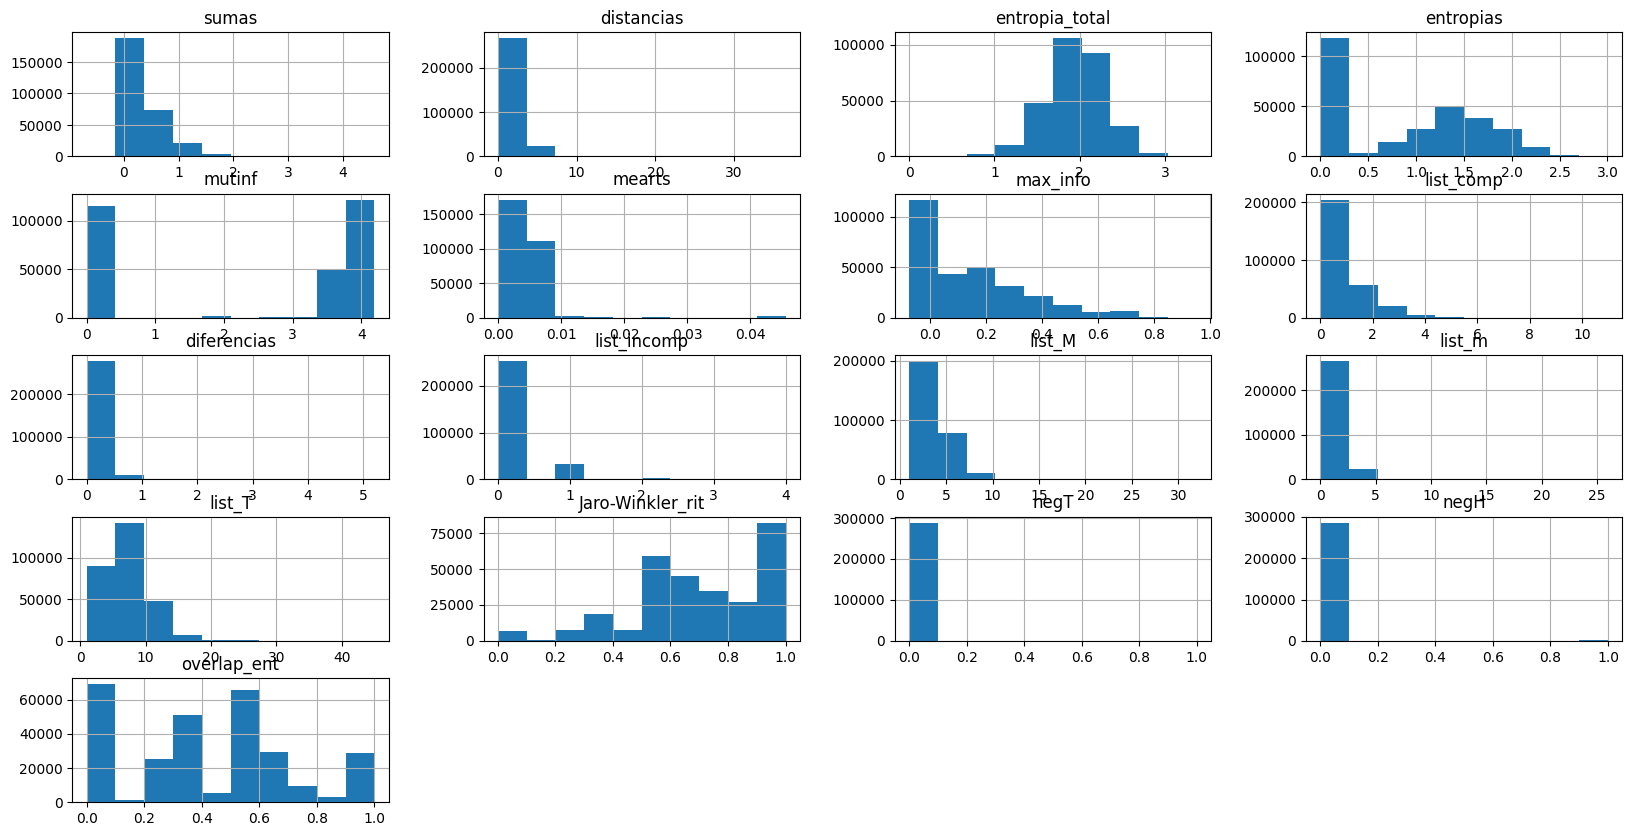

In [20]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [21]:
for i in range(10):
    if i==0:
        test = pd.read_pickle('salida/nuevo4/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [22]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.214869,4.315784,1.623,0.979,3.720471,0.005341,0.079564,0,0.333333,0,4,3,9,0.250000,0,,0,,0.250000,neutral
1,0.196621,1.452301,2.638,1.530,3.683948,0.004802,0.086685,0,0.111111,0,3,1,9,0.666667,0,,0,,0.500000,entailment
2,0.309251,2.855540,2.013,0.986,3.721150,0.004332,0.205498,1,0.222222,0,4,2,9,0.500000,0,,0,,0.333333,contradiction
3,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,1,0.000000,0,2,0,8,1.000000,0,,0,,0.500000,neutral
4,0.000000,0.000000,1.440,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,8,0.333333,0,,0,,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.533072,1.354676,2.122,1.000,3.864398,0.004332,0.175336,2,0.250000,0,5,1,4,0.600000,0,,0,,0.333333,contradiction
9814,0.699345,1.401653,1.947,0.811,4.046023,0.003887,0.632671,1,0.250000,1,3,1,4,1.000000,0,,0,,0.333333,entailment
9815,0.245401,2.847669,1.414,0.811,3.787320,0.004292,0.084199,0,0.250000,0,3,2,8,0.666667,0,,0,,0.333333,contradiction
9816,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,8,0.666667,0,,0,,1.000000,entailment


In [23]:
test=test.drop(["verbH","verbT"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.214869,4.315784,1.623,0.979,3.720471,0.005341,0.079564,0,0.333333,0,4,3,9,0.250000,0,0,0.250000,neutral
1,0.196621,1.452301,2.638,1.530,3.683948,0.004802,0.086685,0,0.111111,0,3,1,9,0.666667,0,0,0.500000,entailment
2,0.309251,2.855540,2.013,0.986,3.721150,0.004332,0.205498,1,0.222222,0,4,2,9,0.500000,0,0,0.333333,contradiction
3,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,1,0.000000,0,2,0,8,1.000000,0,0,0.500000,neutral
4,0.000000,0.000000,1.440,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.533072,1.354676,2.122,1.000,3.864398,0.004332,0.175336,2,0.250000,0,5,1,4,0.600000,0,0,0.333333,contradiction
9814,0.699345,1.401653,1.947,0.811,4.046023,0.003887,0.632671,1,0.250000,1,3,1,4,1.000000,0,0,0.333333,entailment
9815,0.245401,2.847669,1.414,0.811,3.787320,0.004292,0.084199,0,0.250000,0,3,2,8,0.666667,0,0,0.333333,contradiction
9816,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,8,0.666667,0,0,1.000000,entailment


In [24]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.214869,4.315784,1.623,0.979,3.720471,0.005341,0.079564,0,0.333333,0,4,3,9,0.250000,0,0,0.250000,neutral
1,0.196621,1.452301,2.638,1.530,3.683948,0.004802,0.086685,0,0.111111,0,3,1,9,0.666667,0,0,0.500000,entailment
2,0.309251,2.855540,2.013,0.986,3.721150,0.004332,0.205498,1,0.222222,0,4,2,9,0.500000,0,0,0.333333,contradiction
3,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,1,0.000000,0,2,0,8,1.000000,0,0,0.500000,neutral
4,0.000000,0.000000,1.440,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.533072,1.354676,2.122,1.000,3.864398,0.004332,0.175336,2,0.250000,0,5,1,4,0.600000,0,0,0.333333,contradiction
9814,0.699345,1.401653,1.947,0.811,4.046023,0.003887,0.632671,1,0.250000,1,3,1,4,1.000000,0,0,0.333333,entailment
9815,0.245401,2.847669,1.414,0.811,3.787320,0.004292,0.084199,0,0.250000,0,3,2,8,0.666667,0,0,0.333333,contradiction
9816,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,8,0.666667,0,0,1.000000,entailment


In [25]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.214869,4.315784,1.623,0.979,3.720471,0.005341,0.079564,0,0.333333,0,4,3,9,0.250000,0,0,0.250000,neutral
1,0.196621,1.452301,2.638,1.530,3.683948,0.004802,0.086685,0,0.111111,0,3,1,9,0.666667,0,0,0.500000,entailment
2,0.309251,2.855540,2.013,0.986,3.721150,0.004332,0.205498,1,0.222222,0,4,2,9,0.500000,0,0,0.333333,contradiction
3,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,1,0.000000,0,2,0,8,1.000000,0,0,0.500000,neutral
4,0.000000,0.000000,1.440,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.533072,1.354676,2.122,1.000,3.864398,0.004332,0.175336,2,0.250000,0,5,1,4,0.600000,0,0,0.333333,contradiction
9814,0.699345,1.401653,1.947,0.811,4.046023,0.003887,0.632671,1,0.250000,1,3,1,4,1.000000,0,0,0.333333,entailment
9815,0.245401,2.847669,1.414,0.811,3.787320,0.004292,0.084199,0,0.250000,0,3,2,8,0.666667,0,0,0.333333,contradiction
9816,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,8,0.666667,0,0,1.000000,entailment


In [26]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [27]:
# SICK
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    elif i == "neutral":
        y_test.append(2)
    else:
        y_test.append(0)

In [28]:
y_test.count(1)

3366

In [29]:
y_test.count(0)

3235

In [30]:
y_test.count(2)

3217

In [31]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [32]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [33]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [34]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [35]:
X_train.shape

(289367, 17)

In [36]:
model = LogisticRegression(penalty="l2", C=1,max_iter=1000,multi_class='multinomial',solver='newton-cg')
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='multinomial',
                   solver='newton-cg')

In [37]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
model.decision_function(X)

array([[ 0.15197102, -0.44625434,  0.29428332],
       [ 0.71878394, -1.23588225,  0.51709832],
       [-0.02101629, -0.11299118,  0.13400746],
       ...,
       [ 0.51504505, -1.18056414,  0.66551909],
       [ 0.92848107, -2.04581567,  1.1173346 ],
       [-0.95884471,  0.75365807,  0.20518664]])

In [39]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [40]:
model.classes_

array([0, 1, 2])

In [41]:
model.coef_[0]

array([-2.17430647,  6.54914352, -1.0808568 , -0.29634647,  0.51092022,
       -0.35641874,  1.28629649,  1.6453786 , -0.17695949,  1.64184986,
       -3.34975151,  3.11816558,  0.68827808, -0.42625741, -0.02464255,
        0.44864596, -0.22703031])

In [42]:
coeficientes=model.coef_[0]

In [43]:
coeficientes

array([-2.17430647,  6.54914352, -1.0808568 , -0.29634647,  0.51092022,
       -0.35641874,  1.28629649,  1.6453786 , -0.17695949,  1.64184986,
       -3.34975151,  3.11816558,  0.68827808, -0.42625741, -0.02464255,
        0.44864596, -0.22703031])

In [44]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 distancias 10 list_M


In [45]:
n_columns=train.shape[1]-1

In [46]:
n_columns

17

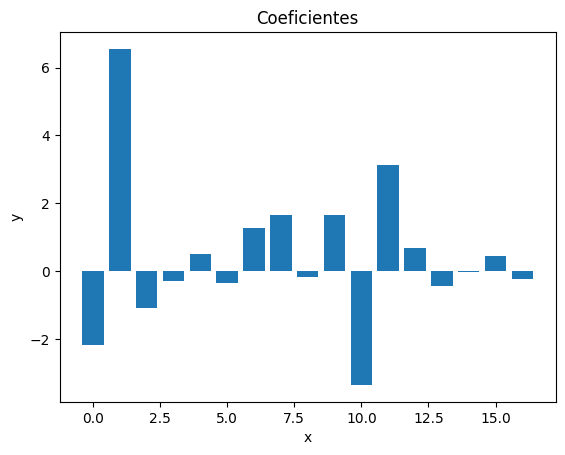

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [48]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [49]:
X_test.shape

(9818, 17)

# ablation

In [210]:
def potencia(c):
    """Calcula y devuelve el conjunto potencia del 
       conjunto c.
    """
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]
def combinaciones(c, n):
    """Calcula y devuelve una lista con todas las
       combinaciones posibles que se pueden hacer
       con los elementos contenidos en c tomando n
       elementos a la vez.
    """
    return [s for s in potencia(c) if len(s) == n]

In [211]:
features=['list_m','mutinf','max_info','diferencias','entropias','distancias','sumas']
new_data = {'feature' : [], 'accuracy' : [],'std_accuracy' : [], 'precision_w' : [],'std_precision_w' : [],
            'recall_w' : [],'std_recall_w' : [],'f1_w' : [],'std_f1_w' : [],'matthews' : [],'std_matthews' : []}

In [212]:
for i in range(len(features)):
    com=combinaciones(features,i+1)
    for c_ in com:
        l=c_[:]
        l.insert(0,"clases")
        train_temp=train.drop(l,axis=1)
        test_temp=test.drop(l,axis=1)
        X_train_cv=np.concatenate((train_temp, test_temp), axis=0)
        scaler = preprocessing.MaxAbsScaler().fit(X_train_cv)
        X_scaled = scaler.transform(X_train_cv)
        X_train_cv = X_scaled
        Y_train_cv=np.concatenate((y_train, y_test), axis=0)
        new_data["feature"].append(c_[:])
        kfold = model_selection.KFold(n_splits=20)
        cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
        new_data["accuracy"].append(round(cv_results.mean(),2))
        new_data["std_accuracy"].append(cv_results.std())
        cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
        new_data["precision_w"].append(round(cv_results.mean(),2))
        new_data["std_precision_w"].append(cv_results.std())
        cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
        new_data["recall_w"].append(round(cv_results.mean(),2))
        new_data["std_recall_w"].append(cv_results.std())
        cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
        new_data["f1_w"].append(round(cv_results.mean(),2))
        new_data["std_f1_w"].append(cv_results.std())
        cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
        new_data["matthews"].append(round(cv_results.mean(),2))
        new_data["std_matthews"].append(cv_results.std())
df_resultados = pd.DataFrame(new_data)
df_resultados.to_csv("SNLI_3ways.csv")

The line search algorithm did not converge
Line Search failed
The line search algorithm did not converge
Line Search failed
The line search algorithm did not converge
Line Search failed
The line search algorithm did not converge
Line Search failed


In [50]:
predictions = model.predict(X_test)

In [51]:
test["predictions"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,0.214869,4.315784,1.623,0.979,3.720471,0.005341,0.079564,0,0.333333,0,4,3,9,0.250000,0,0,0.250000,neutral,0
1,0.196621,1.452301,2.638,1.530,3.683948,0.004802,0.086685,0,0.111111,0,3,1,9,0.666667,0,0,0.500000,entailment,2
2,0.309251,2.855540,2.013,0.986,3.721150,0.004332,0.205498,1,0.222222,0,4,2,9,0.500000,0,0,0.333333,contradiction,0
3,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,1,0.000000,0,2,0,8,1.000000,0,0,0.500000,neutral,1
4,0.000000,0.000000,1.440,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,8,0.333333,0,0,0.500000,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.533072,1.354676,2.122,1.000,3.864398,0.004332,0.175336,2,0.250000,0,5,1,4,0.600000,0,0,0.333333,contradiction,2
9814,0.699345,1.401653,1.947,0.811,4.046023,0.003887,0.632671,1,0.250000,1,3,1,4,1.000000,0,0,0.333333,entailment,0
9815,0.245401,2.847669,1.414,0.811,3.787320,0.004292,0.084199,0,0.250000,0,3,2,8,0.666667,0,0,0.333333,contradiction,0
9816,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,8,0.666667,0,0,1.000000,entailment,1


In [52]:
test[(test["clases"]=="entailment") & (test["predictions"]==0)]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
10,0.426542,5.629711,2.132,1.677,3.808643,0.004434,0.252275,0,1.000000,0,6,4,4,0.333333,0,1,0.500000,entailment,0
13,0.776957,2.766883,2.189,1.906,3.850644,0.005041,0.325769,0,0.500000,0,3,2,4,1.000000,0,0,0.333333,entailment,0
31,1.185234,1.394816,1.791,1.571,3.849422,0.003319,0.398967,4,0.100000,1,6,1,10,0.833333,0,0,0.000000,entailment,0
32,1.185234,1.394816,1.859,1.571,3.849422,0.003319,0.398967,2,0.100000,1,6,1,10,0.833333,0,0,0.333333,entailment,0
33,0.398135,1.416301,1.281,0.918,3.801253,0.005667,0.104715,0,0.166667,0,2,1,6,1.000000,0,0,0.500000,entailment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,0.762227,4.177074,2.350,2.126,3.772796,0.007371,0.416199,1,0.750000,2,4,3,4,0.750000,0,0,0.000000,entailment,0
9782,0.147243,3.393679,1.123,0.764,1.336110,0.031707,0.049486,0,0.500000,0,4,3,6,0.250000,0,0,0.500000,entailment,0
9787,0.528900,2.863626,1.792,1.272,3.737009,0.005339,0.251740,0,0.250000,1,3,2,8,0.666667,0,0,0.333333,entailment,0
9798,0.425767,1.408528,2.284,1.500,3.839034,0.004554,0.179026,0,0.250000,1,3,1,4,0.666667,0,0,0.500000,entailment,0


In [53]:
#test.to_csv("predictions_SICK_DEV.csv")

In [56]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[1871  965  530]
 [ 429 1678 1110]
 [ 313  979 1943]]


In [57]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="micro"),2))
print("recall",round(recall_score(y_test,predictions,average="micro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="micro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.56
recall 0.56
f1_score:  0.56
matthews_score:  0.34


In [58]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.57
recall 0.56
f1_score:  0.56
matthews_score:  0.34


In [60]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.58
recall 0.56
f1_score:  0.56
matthews_score:  0.34


In [61]:
X_train.shape

(289367, 17)

In [62]:
X_test.shape

(9818, 17)

In [63]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [64]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [300]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
# cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
# msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std()),
# cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
# msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
# cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
# msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.560000 (0.002891)


In [301]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.560000 (0.003766)


In [302]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg = "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Recall:: 0.560000 (0.002891)


In [303]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg = "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression F1-score:: 0.560000 (0.003448)


In [304]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.340000 (0.004349)


In [65]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [66]:
#linear_model

In [67]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [68]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57      3235
           1       0.72      0.56      0.63      3366
           2       0.46      0.52      0.49      3217

    accuracy                           0.56      9818
   macro avg       0.57      0.56      0.56      9818
weighted avg       0.58      0.56      0.56      9818



In [125]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [126]:
test.columns[:-2]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [127]:
explainer.expected_value

array([-0.08626391, -0.00513582,  0.09139973])

In [128]:
X_test

array([[0.05195113, 0.32996718, 0.51425856, ..., 0.        , 0.        ,
        0.25      ],
       [0.04753915, 0.11103701, 0.83586819, ..., 0.        , 0.        ,
        0.5       ],
       [0.07477089, 0.21832287, 0.6378327 , ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.05933332, 0.21772107, 0.44803549, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.62008872, ..., 0.        , 0.        ,
        1.        ],
       [0.14387544, 0.22208355, 0.72750317, ..., 0.        , 0.        ,
        0.5       ]])

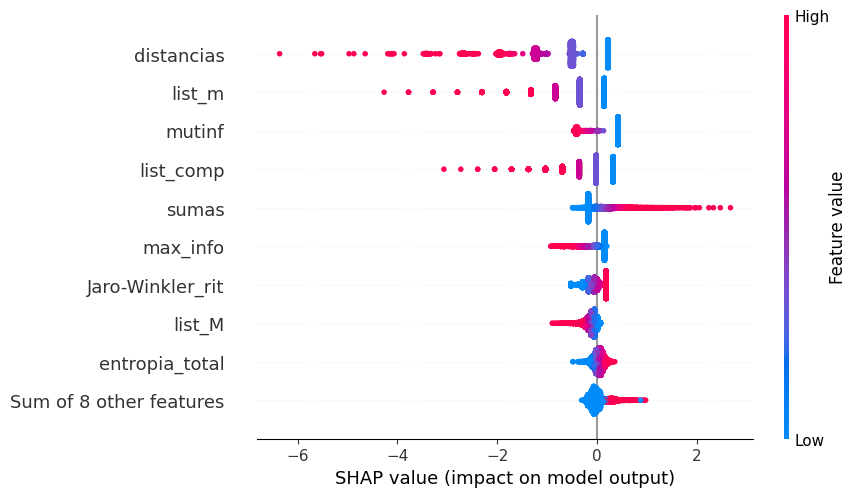

In [132]:
shap.plots.beeswarm(shap_values[:,:,1])

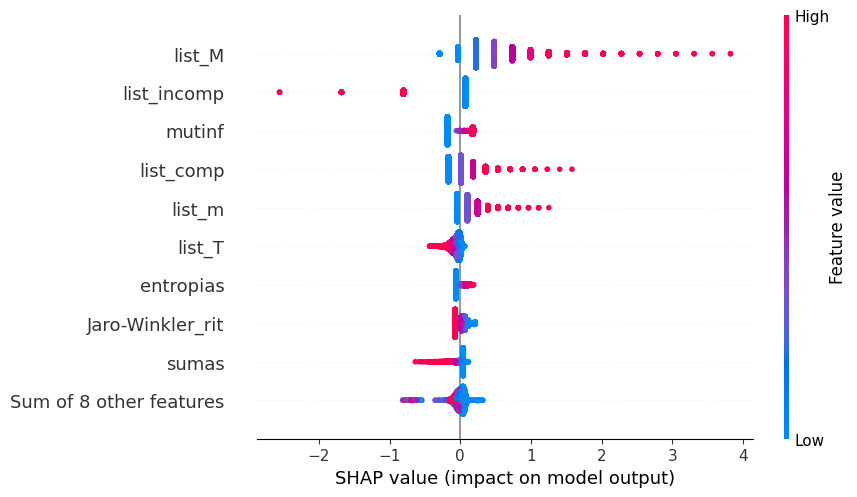

In [133]:
shap.plots.beeswarm(shap_values[:,:,2])

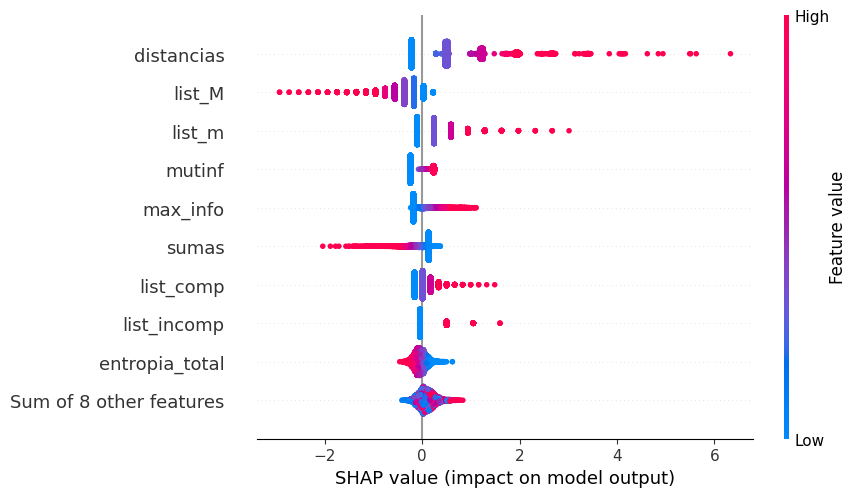

In [134]:
shap.plots.beeswarm(shap_values[:,:,0])

In [63]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.23912561 0.52693283 0.09193841 0.81246962 0.1        0.01923077
 0.33333333 0.17647059 0.11111111 0.46428571 0.66666667 0.
 0.         0.25      ] 0 0


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

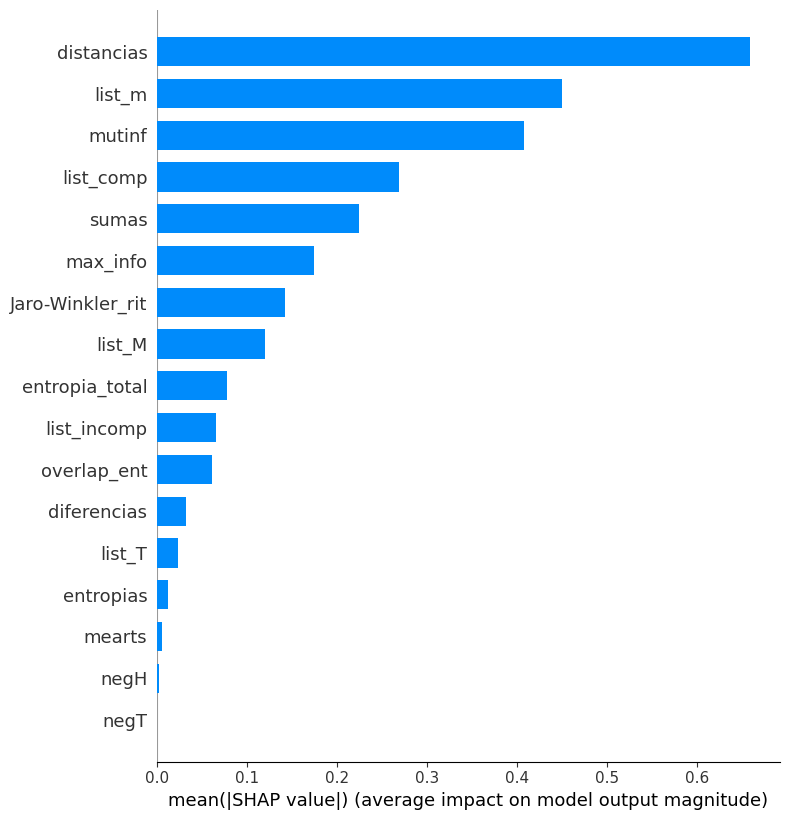

In [138]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

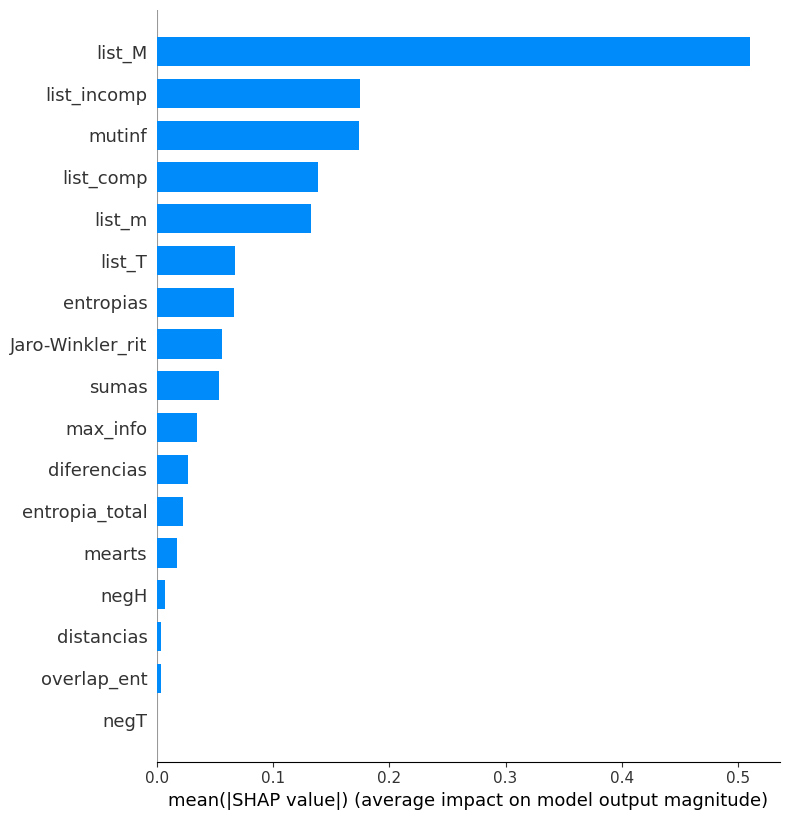

In [139]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

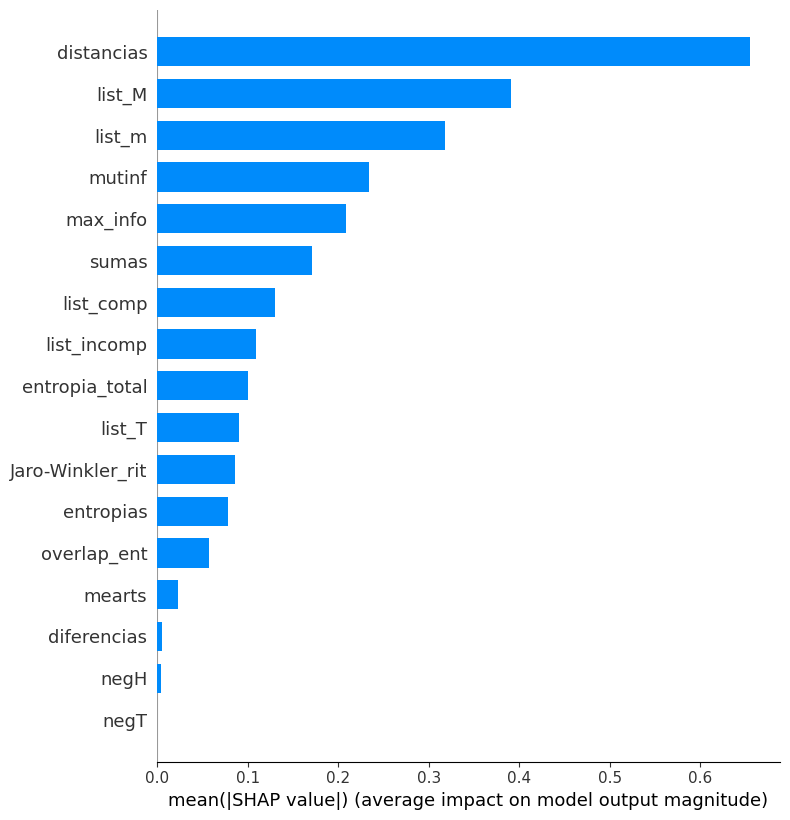

In [140]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

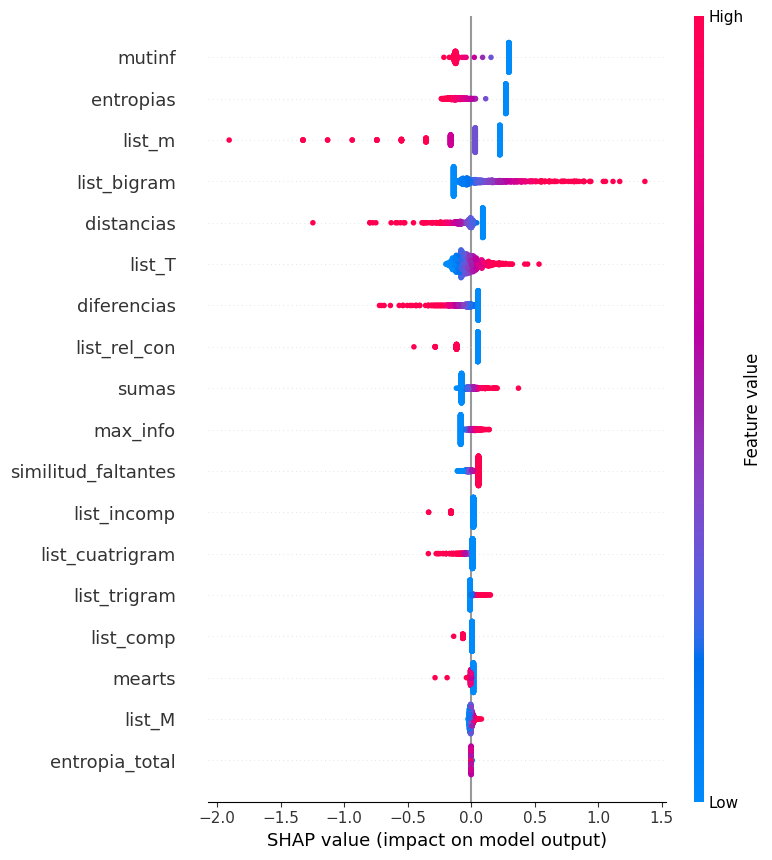

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

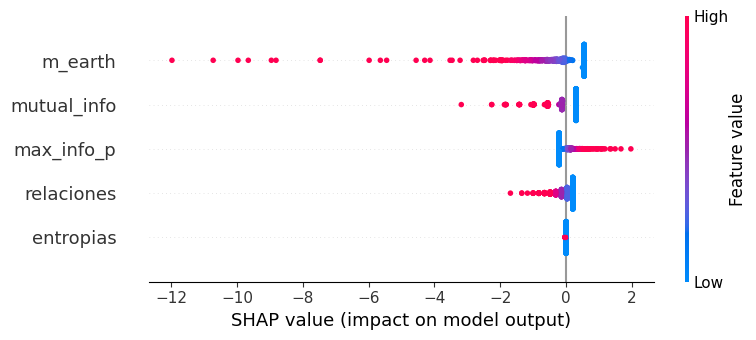

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

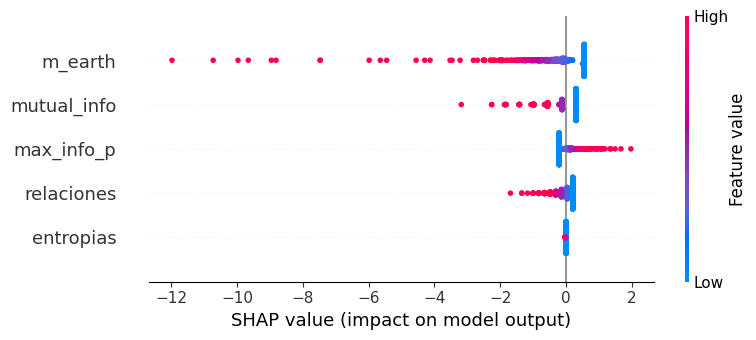

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


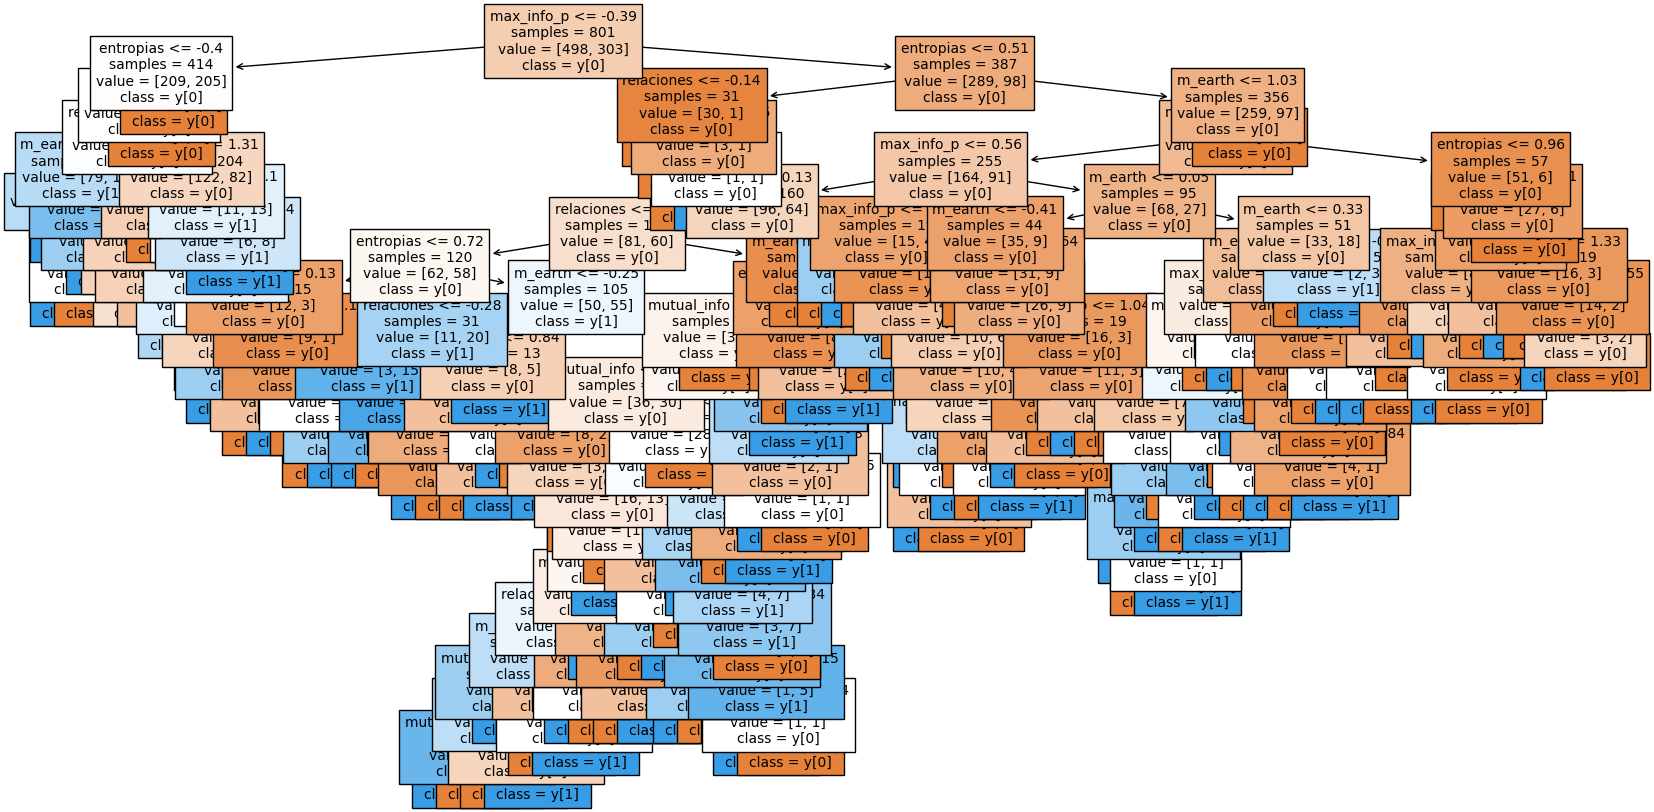

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )